# **Assignment 6**

### **Brief Introduction**

In this assignment you will study the Class Imbalance problem with the help of
the Thyroid Disease Dataset.

*   You are expected to know Class Priors and how to calculate them.
*   You will be exploring various Splitting Methods on the data, observe how they affect performance with the help of various metrics and find the best parameters.
*   You will also explore Oversampling methods and compare performance across 3 models.

*   Please only fill in code where mentioned (TODO Blocks) without distrubing the rest of the code.

*   Make necessary imports in the imports section.

* All cells of the notebook should be run in order one final time before submission.





### **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  make_scorer
from sklearn.model_selection import train_test_split, ShuffleSplit, StratifiedShuffleSplit, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN,  RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

### **Data**

#### Thyroid Disease Dataset





*   30 columns
*   3772 rows
*'binaryClass' is your target which predicts the presence of Thyroid.
* Observe the imbalance in your target class that may lead to skewed results.



	Attribute Name			Possible Values
	--------------			---------------
	age:				continuous.
	sex:				M, F.
	on thyroxine:			f, t.
	query on thyroxine:		f, t.
	on antithyroid medication:	f, t.
	sick:				f, t.
	pregnant:			f, t.
	thyroid surgery:		f, t.
	I131 treatment:			f, t.
	query hypothyroid:		f, t.
	query hyperthyroid:		f, t.
	lithium:			f, t.
	goitre:				f, t.
	tumor:				f, t.
	hypopituitary:			f, t.
	psych:				f, t.
	TSH measured:			f, t.
	TSH:				continuous.
	T3 measured:			f, t.
	T3:				continuous.
	TT4 measured:			f, t.
	TT4:				continuous.
	T4U measured:			f, t.
	T4U:				continuous.
	FTI measured:			f, t.
	FTI:				continuous.
	TBG measured:			f, t.
	TBG:				continuous.
	referral source:		WEST, STMW, SVHC, SVI, SVHD, other.binaryClass:			P, N.


Some additional information on the dataset that might help:

* age - age of the patient
* sex - sex patient identifies
* on_thyroxine - whether patient is on thyroxine
* query on thyroxine - *whether patient is on thyroxine
* on antithyroid meds - whether patient is on antithyroid meds
* sick - whether patient is sick
* pregnant - whether patient is pregnant
* thyroid_surgery - whether patient has undergone thyroid surgery
* I131_treatment - whether patient is undergoing I131 treatment
* query_hypothyroid - whether patient believes they have hypothyroid
* query_hyperthyroid - whether patient believes they have hyperthyroid
* lithium - whether patient * lithium
* goitre - whether patient has goitre
* tumor - whether patient has tumor
* hypopituitary - whether patient * hyperpituitary gland
* psych - whether patient * psych
* TSH_measured - whether TSH was measured in the blood
* TSH - TSH level in blood from lab work
* T3_measured - whether T3 was measured in the blood
* T3 - T3 level in blood from lab work
* TT4_measured - whether TT4 was measured in the blood
* TT4 - TT4 level in blood from lab work
* T4U_measured - whether T4U was measured in the blood (bool)
* T4U - T4U level in blood from lab work (float)
* FTI_measured - whether FTI was measured in the blood (bool)
* FTI - FTI level in blood from lab work (float)
* TBG_measured - whether TBG was measured in the blood (bool)
* TBG - TBG level in blood from lab work
* referral_source
* binaryClass - hyperthyroidism medical diagnosis
  




#### Read Dataset

In [2]:
df = pd.read_csv('hypothyroid.csv')

In [3]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


#### Data Cleaning and Preprocessing

We drop columns that are redundant. For eg. TT4 measured just keeps a track of whether TT4 was measures with a 1 or 0 flag. Given a TT4 value, we know it was measured, so we drop it

In [4]:
df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

Rename the labels to Target column

In [5]:
df.rename(columns={'binaryClass':'Target'}, inplace=True)

In [6]:
df.replace('?',np.nan,inplace=True)

* Check Null Values and handle them by filling the numerical columns with mean.
* Drop remaining Null values
* Convert P, N to 1,0
* Convert categorical columns using one-hot encoding / dummy variables

In [7]:
df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Target               0
dtype: int64

In [8]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    df[i] = pd.to_numeric(df[i])

In [9]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    df[i] = df[i].fillna(df[i].mean())

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Target             0
dtype: int64

In [12]:
df = df.drop(1364)

In [13]:
df.TT4 = df.TT4.astype(int)
df.FTI = df.FTI.astype(int)
df.age = df.age.astype(int)

In [14]:
mapping = {'P': 1, 'N': 0}

# Apply mapping to the target column
df['Target'] = df['Target'].map(mapping)

In [15]:
from sklearn.preprocessing import LabelEncoder

cols = ['sex'	,'sick','pregnant',	'thyroid surgery'	,'I131 treatment'	,'lithium'	,'goitre','tumor']

df = pd.get_dummies(df, columns=cols, prefix=cols)

In [16]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to the data and transform it
to_scale = ['age','TSH','T3','TT4','T4U','FTI']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to the selected columns and transform them
df[to_scale] = scaler.fit_transform(df[to_scale])

In [17]:
df

,age,TSH,T3,TT4,T4U,FTI,Target,sex_F,sex_M,sick_f,...,thyroid surgery_f,thyroid surgery_t,I131 treatment_f,I131 treatment_t,lithium_f,lithium_t,goitre_f,goitre_t,tumor_f,tumor_t
0,0.430108,0.002443,0.232227,0.287383,0.429952,0.272265,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
1,0.236559,0.007726,0.184834,0.233645,0.359903,0.274809,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
2,0.483871,0.001840,0.186114,0.250000,0.318841,0.300254,1,False,True,True,...,True,False,True,False,True,False,True,False,True,False
3,0.741935,0.000292,0.175355,0.404206,0.359903,0.274809,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
4,0.741935,0.001349,0.109005,0.137850,0.299517,0.173028,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.311828,0.009588,0.186114,0.247664,0.359903,0.274809,1,True,False,True,...,True,False,True,False,True,False,True,False,False,True
3768,0.720430,0.001877,0.194313,0.285047,0.400966,0.284987,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
3769,0.784946,0.009613,0.165877,0.257009,0.396135,0.262087,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
3770,0.763441,0.001311,0.184834,0.186916,0.333333,0.216285,1,False,True,True,...,True,False,True,False,True,False,True,False,True,False


### **Class Imbalance**

#### Observing the Imbalance

In [18]:
df['Target'].value_counts()

Target
1    3340
0     280
Name: count, dtype: int64

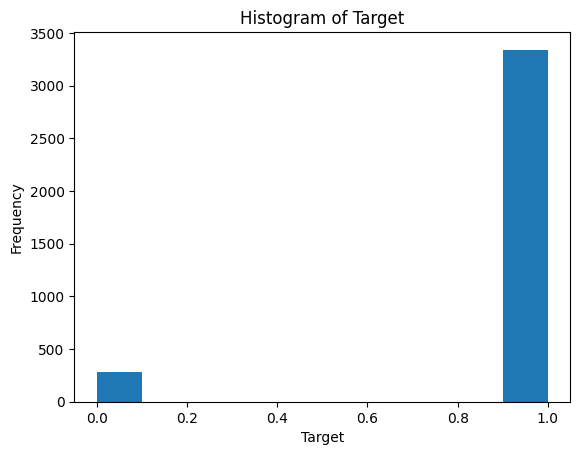

In [19]:
plt.hist(df['Target'], bins=10)

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of Target')

# Show the histogram
plt.show()

The numerical counts and the histogram both prove that there is a disparity between those that were diagnosed positively with thyroid as opposed to those who were diagnosed negatively. Creating distinct majority and minority classes.


*   Class 1 - majority
*   Class 0 - minority




#### Class Priors

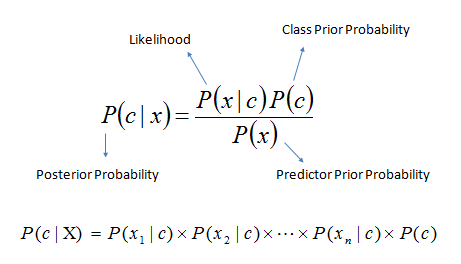


We are trying to calculate **P(c)** which is basically the relative frequency of each class within our Target Variable.

In [20]:
class_prior = df['Target'].value_counts(normalize=True)
print("Class Prior:")
print(class_prior)

Class Prior:
Target
1    0.922652
0    0.077348
Name: proportion, dtype: float64


#### Class Priors Classifier **(TODO)**

In the following cell you have to create your own Classifier which classifies on the basis of these class priors. During training, this class computes class prior probabilities. During prediction, it simply outputs the class with the class with highest prior probability.

Create two methods similar to scikitlearn as follows:


*   fit(X, y) - computes class probabilities
*   predict(X) - returns the predicted value




In [21]:
class ClassPriorClassifier:
    def __init__(self):
        self.class_priors = None
        self.classes = None

    def fit(self, X, y):
      """
      Input:
      X : features as pandas dataframe
      y : labels as pandas column

      Output:
      none: returns nothing, function is solely for computation purposes
      """

      ##### TO DO ######

      # Compute class prior probabilities during training #
      class_counts = y.value_counts()
      # Calculate the proportion of each class
      self.class_priors = class_counts / len(y)
      # Get the unique classes
      self.classes = class_counts.index

      ###### END #######



    def predict(self, X):
      """
      Input:
      X : features as pandas dataframe

      Output:
      predictions: returns the predicted values
      """

      ##### TO DO ######
      
      # Predict the class with the highest prior probability for each sample in X and save in a list '""predictions"""#
      highest_prior_class = self.class_priors.idxmax()
      predictions = [highest_prior_class] * len(X)

      ###### END #######

      return predictions

In [22]:
X = df.drop('Target',axis=1)
y= df['Target']

##### Class Priors Classifier Training

In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Train classifier
classifier = ClassPriorClassifier()
classifier.fit(X_train, y_train)

# Predict using the trained classifier
predictions = classifier.predict(X_test)

##### Class Priors Classifier Evaluation

The following function 'metrics' has the necessary evaluation metrics that will be used multiple times across this notebook.

In [25]:
def metrics(predictions,y):
  accuracy = accuracy_score(y, predictions)
  print('Accuracy: ',accuracy)
  precision = precision_score(y, predictions, average='weighted', labels=np.unique(predictions))
  print('Precision: ',precision)
  recall = recall_score(y, predictions, average='weighted', labels=np.unique(predictions))
  print('Recall: ',recall)
  f1 = f1_score(y, predictions, average='weighted', labels=np.unique(predictions))
  print('F1-score: ', f1)

In [26]:
# Model Evaluation on Test Set
metrics(predictions,y_test)

Accuracy:  0.9244935543278084
Precision:  0.9244935543278084
Recall:  1.0
F1-score:  0.9607655502392345


###**Shuffle Split (TODO)**

This class shuffles the data before splitting it into train and test sets, allowing for randomness in the selection process. By randomly sampling from the entire dataset, ShuffleSplit ensures that each split contains a representative distribution of classes, which can help models learn from and generalize to imbalanced datasets more effectively.
1. ***You will use this function to split the data into 20 different train/test splits.***
2. ***Next, you will compute the min, max and average class ratios for train and test split.***

In [27]:
if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
    y = y.reset_index(drop=True)

In [28]:
##### TO DO ######

# Initialize shuffle split and Split data into 20 different train_test_splits#
shuffle_split = ShuffleSplit(n_splits=20, test_size=0.3, random_state=42)

###### END #######

In [29]:
# Check your splits
shuffle_split.get_n_splits(X)

20

In [30]:
##### TO DO ######

## Compute the min, max and average class ratios for train and test split. ##
# Lists to store ratios
train_ratios = []
test_ratios = []

# Compute class ratios for each split
for train_index, test_index in shuffle_split.split(X, y):
    y_train, y_test = y[train_index], y[test_index]
    train_ratio = y_train.value_counts(normalize=True).min()
    test_ratio = y_test.value_counts(normalize=True).min()
    train_ratios.append(train_ratio)
    test_ratios.append(test_ratio)

# Calculate min, max and average class ratios for train and test split
min_train_ratio = min(train_ratios)
max_train_ratio = max(train_ratios)
avg_train_ratio = np.mean(train_ratios)

min_test_ratio = min(test_ratios)
max_test_ratio = max(test_ratios)
avg_test_ratio = np.mean(test_ratios)

###### END #######

# Print the results
print("Train Split - Min Class Ratio:", min_train_ratio)
print("Train Split - Max Class Ratio:", max_train_ratio)
print("Train Split - Average Class Ratio:", avg_train_ratio)

print("Test Split - Min Class Ratio:", min_test_ratio)
print("Test Split - Max Class Ratio:", max_test_ratio)
print("Test Split - Average Class Ratio:", avg_test_ratio)

Train Split - Min Class Ratio: 0.07300710339384373
Train Split - Max Class Ratio: 0.08129439621152329
Train Split - Average Class Ratio: 0.07736779794790846
Test Split - Min Class Ratio: 0.06813996316758748
Test Split - Max Class Ratio: 0.08747697974217311
Test Split - Average Class Ratio: 0.07730202578268877


### **Stratified Shuffle Split**

In this section you will explore the effects of StratifiedShuffleSplit on various model performances
1. Ridge Classifier
1. Decision Tree Classifier
3. Support Vector Classifier

Note: please remember to give distinct model names to all as you will be reusing them further in the notebook.


***In the following cell you will generate one train/test split using StratifiedShuffleSplit.***

#### **Splitting the data**

In [31]:
##### TO DO ######

# Initialize StratifiedShuffleSplit with 1 split #
strat_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

## Split and Store train and test sets in X_train_strat, y_train_stat, x_test_stat, y_test_stat
for train_index, test_index in strat_shuffle_split.split(X, y):
    X_train_strat, X_test_strat = X.iloc[train_index], X.iloc[test_index]
    y_train_strat, y_test_strat = y[train_index], y[test_index]

###### END #######

In [32]:
# Print the shapes of the train and test sets
print("Train set shape:", X_train_strat.shape, y_train_strat.shape)
print("Test set shape:", X_test_strat.shape, y_test_strat.shape)

# Print the unique values and their counts in the target variable y for both train and test sets
print("Train set - Unique values and counts:", np.unique(y_train, return_counts=True))
print("Test set - Unique values and counts:", np.unique(y_test, return_counts=True))

Train set shape: (2534, 22) (2534,)
Test set shape: (1086, 22) (1086,)
Train set - Unique values and counts: (array([0, 1], dtype=int64), array([ 196, 2338], dtype=int64))
Test set - Unique values and counts: (array([0, 1], dtype=int64), array([  84, 1002], dtype=int64))


#### **QUESTION (TODO)**

**Question:**  *Why is StratifiedShuffleSplit better than ShuffleSplit?*


**Your Answer:**


Maintained Class Proportions: The StratifiedShuffleSplit ensures that the proportion of each class in the splits matches the proportion in the full dataset. This is critical for your thyroid disease dataset, which is inherently imbalanced. And the results showed that both the training and testing sets maintained the imbalance ratio present in the original dataset, which is essential for developing a model that accurately reflects the real-world distribution of the disease.

Improved Model Reliability and Fairness: By preserving the class distribution in each split, models trained using StratifiedShuffleSplit are more likely to be fair and reliable, particularly for the minority class. This is because the models have a chance to learn from a representative sample of each class, thereby improving their ability to generalize from the training data to unseen data.

Accurate Model Evaluation: The consistent representation of classes in both training and testing sets means that model evaluation metrics (such as accuracy, precision, recall, and F1-score) are more reflective of true performance. This is particularly important for imbalanced datasets, where traditional splits might overestimate the model's performance by biasing the evaluation towards the majority class.

Reduction in Evaluation Variance: StratifiedShuffleSplit leads to more consistent training and testing sets across different splits compared to ShuffleSplit. This consistency is crucial for reducing variance in model evaluation, ensuring that the performance metrics are stable and reliable across multiple runs. And the results highlighted how StratifiedShuffleSplit can provide consistent class ratios across splits, which is not guaranteed with ShuffleSplit.

Thus, we can conclude that StratifiedShuffleSplit offers a strategic advantage in dealing with the class imbalance problem present in the Thyroid Disease dataset. By ensuring that each split reflects the overall class distribution, it aids in developing more accurate, reliable, and fair predictive models.

#### **Training, Testing and Evaluation (TODO)**

You have to make changes in the following function that will train the data on the given model and give evaluation metrics for comparison. This function will be used further in the notebook.

In [33]:
def TrainAndEvaluate(model,model_name, X_train, y_train, X_test, y_test):
  """
  Inputs:
  model: the classifier that you want to train
  model_name: name of the model as a string
  X_train, y_train, X_test, y_test: the training and testing data

  Returns nothing, only prints
  """

  ##### TO DO ######
  
  # fit the model
  model.fit(X_train, y_train)

  ###### END #######

  print("Model Training Complete!")

  print("-----------------------------------")


  print(model_name,"Evaluation Metrics")
  print("-----------------------------------")

  print("Training Set: ")
  
  ##### TO DO ######

  # Make predictions on the training set and evaluate using the 'metrics' function defined earlier in the notebook
  train_predictions = model.predict(X_train)
  print("Evaluation on Training Set:")
  metrics(train_predictions, y_train)
  
  ###### END #######

  print("-----------------------------------")

  print("Testing Set: ")
  
  ##### TO DO ######

  # Make predictions on the test set and evaluate using the 'metrics' function
  # Make predictions on the test set
  test_predictions = model.predict(X_test)
    
  # Evaluate using the 'metrics' function
  print("Evaluation on Testing Set:")
  metrics(test_predictions, y_test)
  
  ###### END #######

##### **Ridge (TODO)**

1. Initialize the Ridge classifier with `class_weights=None`
2. Train and Evaluate the model using the TrainAndEvaluate function

**Be sure to use the StratifiedShuffleSplit Data (X_train_strat, y_train_strat, X_test_strat, y_test_strat).**



In [34]:
##### TO DO ######

#Initialize RFC
ridge_classifier = RidgeClassifier(class_weight=None)

#use the TrainAndEvaluate function for Training and Evaluation
TrainAndEvaluate(ridge_classifier, "Ridge Classifier", X_train_strat, y_train_strat, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Ridge Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  0.9325177584846093
Precision:  0.9371169865831074
Recall:  0.9325177584846093
F1-score:  0.9076007471589568
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.929097605893186
Precision:  0.921565650076507
Recall:  0.929097605893186
F1-score:  0.903102157514354


##### **Decision Tree (TODO)**

1. Initialize the Decision Tree Classifier with `class_weights=None`
2. Train and Evaluate the model using the TrainAndEvaluate function

Be sure to use the StratifiedShuffleSplit Data for the same.


In [35]:
##### TO DO ######

#Initialize DTC
decision_tree_classifier = DecisionTreeClassifier(class_weight=None)

#use the TrainAndEvaluate function for Training and Evaluation
TrainAndEvaluate(decision_tree_classifier, "Decision Tree Classifier", X_train_strat, y_train_strat, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Decision Tree Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.9668508287292817
Precision:  0.9694793236229702
Recall:  0.9668508287292817
F1-score:  0.9678559542035545


##### **SVC (TODO)**

1. Initialize SVC with `class_weights=None`
2. Train and Evaluate the model using the TrainAndEvaluate function

Be sure to use the StratifiedShuffleSplit Data for the same.


In [36]:
##### TO DO ######

#Initialize SVC
svc_classifier = SVC(class_weight=None)

#use the TrainAndEvaluate function for Training and Evaluation
TrainAndEvaluate(svc_classifier, "SVC", X_train_strat, y_train_strat, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
SVC Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  0.9293606945540647
Precision:  0.9343843082508554
Recall:  0.9293606945540647
F1-score:  0.9009811282570254
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.927255985267035
Precision:  0.9325721528562156
Recall:  0.927255985267035
F1-score:  0.8963501675321748


#### **Hyperparameter Tuning (TODO)**

Next, you have to tune the hyperparamater `class_weight` to find the best f-score for each of these classifiers.

Make necessary changes in the CrossValidate function



In [37]:
def CrossValidate(model, param_grid):

    ##### TO DO ######

    # Perform grid search with cross-validation and refit the best estimator
    # keep 'refit' = True, scoring = F1 since we are observing the f score
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', refit=True, cv=5, verbose=1)
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # The best estimator after the grid search
    best_model = grid_search.best_estimator_
    
    ###### END #######



    print("Training Set: ")
    
    ##### TO DO ######

    # Make predictions on the training set and evaluate using the 'metrics' function
    train_predictions = best_model.predict(X_train)
    metrics(train_predictions, y_train)
    
    ###### END #######
    
    print("-----------------------------------")




    print("Testing Set: ")
    
    ##### TO DO ######


    # Make predictions on the testing set and evaluate using the 'metrics' function
    test_predictions = best_model.predict(X_test)
    metrics(test_predictions, y_test)

    ###### END #######
    
    print("-----------------------------------")


    ###### TODO #######
    
    # Store best hyperparameters and results
    best_hyperparams = grid_search.best_params_

    # store results of grid search
    results = grid_search.cv_results_

    ###### END #######

    #Print the Best Hyperparameters
    print("Best Hyperparameters:", best_hyperparams)

    # Plotting f1-score vs Class Weight
    params = results['params']
    print(params)
    mean_f1_scores = results['mean_test_score']

    # Extract the parameter values and corresponding F1 scores
    param_values = [param['class_weight'][0] for param in params]

    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, mean_f1_scores, marker='o', color='b', linestyle='-')

    # Add labels and title
    plt.xlabel('0 Class Weight')
    plt.ylabel('Mean F1 Score')
    plt.title('Grid Search Results:  F1 Score vs. Class Weight')

    # Show grid and display the plot
    plt.grid(True)
    plt.show()

NOTE: Here is a sample notation for the hyperparameter `class_weight`:

`{class1: weight1, class2: weight2}`

`eg: [{class1: weight1, class2: weight2}, {class1: weight3, class2: weight4}....]`

`where weight can be any positive number`

You should have a collection / various combinations / list of these dictionaries of weights for each class in your param_grid for hyperparameter tuning.
Be careful with your choice of weights keeping in mind which class deserves to have more weight.
Then cross validate using the CrossValidate() function described earlier

In [38]:
##### TO DO ######

# Define the parameter grid for class_weight with custom weights
# param_grid = {}
param_grid = [
    {'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 20}, {0: 2, 1: 1}, {0: 5, 1: 1}, {0: 10, 1: 1}, {0: 20, 1: 1}]},
]

###### END #######

##### **Ridge (TODO)**

RIDGE: 
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training Set: 
Accuracy:  0.9226519337016574
Precision:  0.9226519337016573
Recall:  1.0
F1-score:  0.9597701149425287
-----------------------------------
Testing Set: 
Accuracy:  0.9226519337016574
Precision:  0.9226519337016574
Recall:  1.0
F1-score:  0.9597701149425287
-----------------------------------
Best Hyperparameters: {'class_weight': {0: 1, 1: 1}}
[{'class_weight': {0: 1, 1: 1}}, {'class_weight': {0: 1, 1: 2}}, {'class_weight': {0: 1, 1: 5}}, {'class_weight': {0: 1, 1: 10}}, {'class_weight': {0: 1, 1: 20}}, {'class_weight': {0: 2, 1: 1}}, {'class_weight': {0: 5, 1: 1}}, {'class_weight': {0: 10, 1: 1}}, {'class_weight': {0: 20, 1: 1}}]


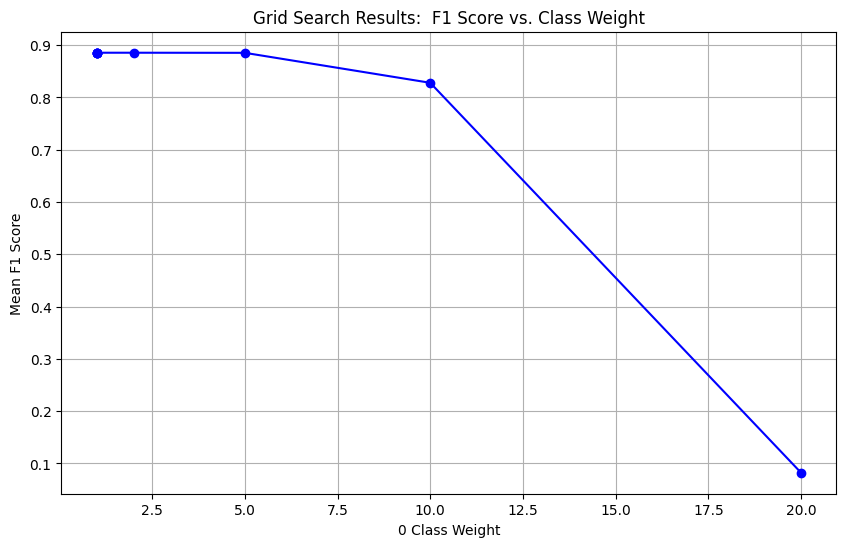

In [39]:
print("RIDGE: ")

##### TO DO ######

# Cross Validate using the CrossValidate() function with your Ridge Classifier which was defined earlier and the param_grid
ridge_classifier = RidgeClassifier()
CrossValidate(ridge_classifier, param_grid)

###### END #######

##### **Decision Tree (TODO)**

DECISION TREE: 
Fitting 5 folds for each of 9 candidates, totalling 45 fits


Training Set: 
Accuracy:  0.9956590370955012
Precision:  0.9958897162836629
Recall:  0.9956590370955012
F1-score:  0.995713163043413
-----------------------------------
Testing Set: 
Accuracy:  0.8637200736648251
Precision:  0.8591130707843415
Recall:  0.8637200736648251
F1-score:  0.8613997742004118
-----------------------------------
Best Hyperparameters: {'class_weight': {0: 10, 1: 1}}
[{'class_weight': {0: 1, 1: 1}}, {'class_weight': {0: 1, 1: 2}}, {'class_weight': {0: 1, 1: 5}}, {'class_weight': {0: 1, 1: 10}}, {'class_weight': {0: 1, 1: 20}}, {'class_weight': {0: 2, 1: 1}}, {'class_weight': {0: 5, 1: 1}}, {'class_weight': {0: 10, 1: 1}}, {'class_weight': {0: 20, 1: 1}}]


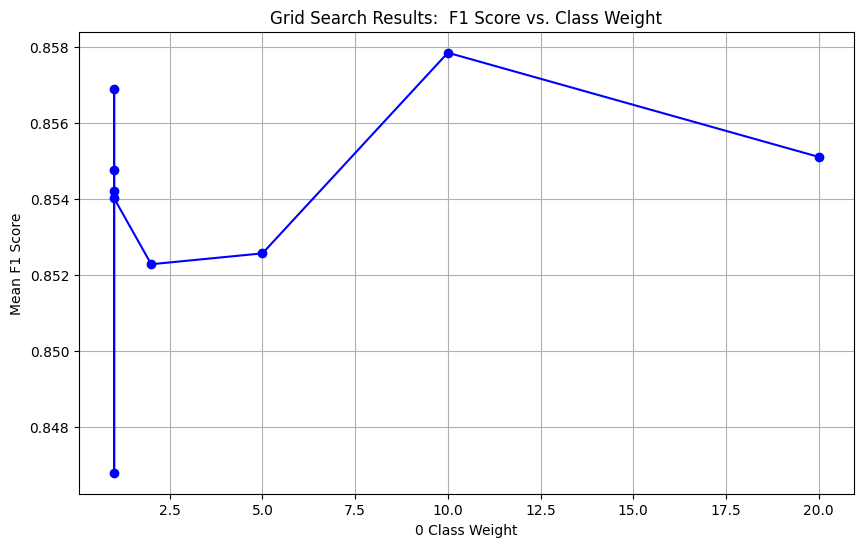

In [40]:
print("DECISION TREE: ")

##### TO DO ######

# Cross Validate your Decision Tree Classifier which was defined earlier using CrossValidate()
decision_tree_classifier = DecisionTreeClassifier()
CrossValidate(decision_tree_classifier, param_grid)

###### END #######

##### **Support Vector (TODO)**

SVC: 
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training Set: 
Accuracy:  0.9226519337016574
Precision:  0.9226519337016573
Recall:  1.0
F1-score:  0.9597701149425287
-----------------------------------
Testing Set: 
Accuracy:  0.9226519337016574
Precision:  0.9226519337016574
Recall:  1.0
F1-score:  0.9597701149425287
-----------------------------------
Best Hyperparameters: {'class_weight': {0: 1, 1: 1}}
[{'class_weight': {0: 1, 1: 1}}, {'class_weight': {0: 1, 1: 2}}, {'class_weight': {0: 1, 1: 5}}, {'class_weight': {0: 1, 1: 10}}, {'class_weight': {0: 1, 1: 20}}, {'class_weight': {0: 2, 1: 1}}, {'class_weight': {0: 5, 1: 1}}, {'class_weight': {0: 10, 1: 1}}, {'class_weight': {0: 20, 1: 1}}]


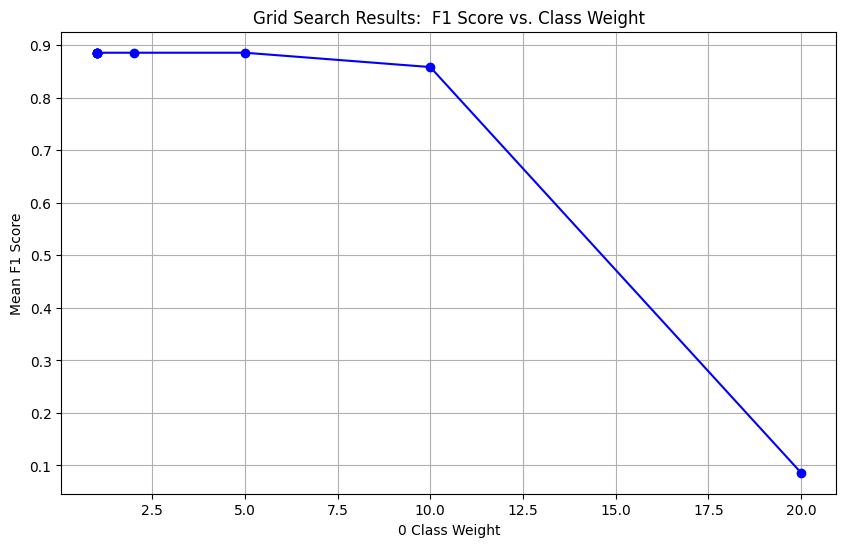

In [41]:
print("SVC: ")

##### TO DO ######

# Cross Validate your SVC which was defined earlier using CrossValidate()
svc_classifier = SVC()
CrossValidate(svc_classifier, param_grid)

###### END #######

### **Oversampling**

In this section we will explore various oversampling methods and observe the subsequent effects on the performance on our classifiers

####**Random oversampling**

Use the RandomOverSampler to resample the **Stratified training data** and test with Stratified testing data

##### Initialize **(TODO)**

In [42]:
##### TO DO ######

# initialise RandomOverSampler
ros = RandomOverSampler(random_state=42)

# fit and assign
X_resampled, y_resampled = ros.fit_resample(X_train_strat, y_train_strat)

###### END #######

**Remember to use X_resampled, y_resampled for training and X_test_strat, y_test_strat for testing**

##### Refit Ridge Classifier **(TODO)**

In [43]:
##### TO DO ######

# train and evaluate using TrainAndEvaluate() using Ridge Classifier defined earlier
ridge_classifier = RidgeClassifier()
TrainAndEvaluate(ridge_classifier, "Ridge Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Ridge Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  0.7630453378956373
Precision:  0.7695796651810322
Recall:  0.7630453378956373
F1-score:  0.7616007008864153
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.8287292817679558
Precision:  0.9179275961043917
Recall:  0.8287292817679558
F1-score:  0.861015987997942


##### Refit Decision Tree Classifier **(TODO)**

In [44]:
##### TO DO ######

# train and evaluate using TrainAndEvaluate()  using DT Classifier defined earlier
decision_tree_classifier = DecisionTreeClassifier()
TrainAndEvaluate(decision_tree_classifier, "Decision Tree Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Decision Tree Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.9732965009208103
Precision:  0.9749061466264565
Recall:  0.9732965009208103
F1-score:  0.9739151699832032


##### Refit SVC **(TODO)**

In [45]:
##### TO DO ######

# train and evaluate using TrainAndEvaluate() using SV Classifier defined earlier
svc_classifier = SVC()
TrainAndEvaluate(svc_classifier, "SVC", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
SVC Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  0.7840034217279727
Precision:  0.7967193349831843
Recall:  0.7840034217279727
F1-score:  0.781664225693828
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.8674033149171271
Precision:  0.9195699767574
Recall:  0.8674033149171271
F1-score:  0.8871483523454712


####**SMOTE**

Use SMOTE to resample the **Stratified training data** and test with Stratified testing data

##### Initialize

In [46]:
##### TO DO ######

# initialise, fit and assign
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_strat, y_train_strat)

###### END #######

**Remember to use X_resampled, y_resampled for training and X_test_strat, y_test_strat for testing**

##### Refit Ridge Classifier **(TODO)**

In [47]:
##### TO DO ######

# train and evaluate using TrainAndEvaluate() using Ridge Classifier defined earlier
ridge_classifier_smote = RidgeClassifier()
TrainAndEvaluate(ridge_classifier_smote, "Ridge Classifier with SMOTE", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Ridge Classifier with SMOTE Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  0.7737382378100941
Precision:  0.7813272497418585
Recall:  0.7737382378100941
F1-score:  0.7722019825468102
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.8443830570902394
Precision:  0.9121572332156201
Recall:  0.8443830570902394
F1-score:  0.8702688508409085


##### Refit DT Classifier **(TODO)**

In [48]:
##### TO DO ######

# train and evaluate using TrainAndEvaluate() using DT Classifier defined earlier
decision_tree_classifier_smote = DecisionTreeClassifier()
TrainAndEvaluate(decision_tree_classifier_smote, "Decision Tree Classifier with SMOTE", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Decision Tree Classifier with SMOTE Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.9760589318600368


Precision:  0.9777479267548166
Recall:  0.9760589318600368
F1-score:  0.9766714010054247


##### Refit SVC **(TODO)**

In [49]:
##### TO DO ######

# train and evaluate using TrainAndEvaluate() using SV Classifier defined earlier
svc_classifier_smote = SVC()
TrainAndEvaluate(svc_classifier_smote, "SVC with SMOTE", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
SVC with SMOTE Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  0.7869974337040205
Precision:  0.8016926192906598
Recall:  0.7869974337040205
F1-score:  0.784371666469124
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.8766114180478821
Precision:  0.9181753789488596
Recall:  0.8766114180478821
F1-score:  0.8928205392173685


####**ADASYN**

Use ADASYN to resample the **Stratified training data** and test with Stratified testing data

##### Initialize

In [50]:
##### TO DO ######

# initialise, fit and assign
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train_strat, y_train_strat)

###### END #######

**Remember to use X_resampled, y_resampled for training and X_test_strat, y_test_strat for testing**

##### Refit Ridge Classifier **(TODO)**

In [51]:
##### TO DO ######

# train and evaluate using TrainAndEvaluate() using Ridge Classifier defined earlier
ridge_classifier_adasyn = RidgeClassifier()
TrainAndEvaluate(ridge_classifier_adasyn, "Ridge Classifier with ADASYN", X_resampled_adasyn, y_resampled_adasyn, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Ridge Classifier with ADASYN Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  0.7791199309749784
Precision:  0.7807030252270796
Recall:  0.7791199309749784
F1-score:  0.7787037415389515
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.8195211786372008
Precision:  0.9214659822629729
Recall:  0.8195211786372008
F1-score:  0.8553521711901086


##### Refit DT Classifier **(TODO)**

In [52]:
##### TO DO ######

# train and evaluate using TrainAndEvaluate() using DT Classifier defined earlier
decision_tree_classifier_adasyn = DecisionTreeClassifier()
TrainAndEvaluate(decision_tree_classifier_adasyn, "Decision Tree Classifier with ADASYN", X_resampled_adasyn, y_resampled_adasyn, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Decision Tree Classifier with ADASYN Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.9696132596685083
Precision:  0.9723305969814454
Recall:  0.9696132596685083
F1-score:  0.9706052928787278


##### Refit SVC **(TODO)**

In [53]:
##### TO DO ######

# train and evaluate using TrainAndEvaluate() using SV Classifier defined earlier
svc_classifier_adasyn = SVC()
TrainAndEvaluate(svc_classifier_adasyn, "SVC with ADASYN", X_resampled_adasyn, y_resampled_adasyn, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
SVC with ADASYN Evaluation Metrics
-----------------------------------
Training Set: 
Evaluation on Training Set:
Accuracy:  0.7670405522001725
Precision:  0.7679508069967804
Recall:  0.7670405522001725
F1-score:  0.7667529061271268
-----------------------------------
Testing Set: 
Evaluation on Testing Set:
Accuracy:  0.7900552486187845
Precision:  0.9169550969559095
Recall:  0.7900552486187845
F1-score:  0.8344704776686115
